In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import uuid
import cv2
from PIL import Image
import tensorflow as tf
# import tensorflow_io as tfio

# from pydicom import dcmread 

from duke_dbt_data import dcmread_image

In [2]:
df_paths = pd.read_csv("file-paths.csv")
df_labels = pd.read_csv("labels-train.csv")
df_boxes = pd.read_csv("BCS-DBT boxes-train-v2.csv")
# df_paths = df_paths.drop('classic_path',)
# df_true = pd.merge(df_paths[['PatientID','descriptive_path']], df_labels, on='PatientID')
df_true = df_paths.merge(df_labels, how='inner')
df_true = df_true.merge(df_boxes, how='inner')
# df_true = pd.merge(df_true, df_boxes,on='PatientID')


df_true['descriptive_path'] = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/manifest-1677805544485/' + df_true['descriptive_path'].astype(str)
df_paths['descriptive_path'] = '/Volumes/My Passport/MRI dataset/manifest-1617905855234/' + df_paths['descriptive_path'].astype(str)

#WINDOWS
#df_true['descriptive_path'] = df_true['descriptive_path'].str.replace('/',R'\\')
#MAC
df_true['descriptive_path'] = df_true['descriptive_path']
print(len(df_paths))
# print(df_true.columns)

teste = df_true.loc[df_true['PatientID'] == 'DBT-P00023']
df_true[(df_true[['Cancer','Benign','Actionable']] == 1).any(axis=1)]


##REMOVENDO TRUE POSITIVE DO DATASET PATH PARA FILTRAR IMAGENS SEM LABEL
df_paths = df_paths[~df_paths['PatientID'].isin(df_true['PatientID'])]
print(len(df_paths))
print(df_paths.columns)
print(df_paths[:10])


19148
18948
Index(['PatientID', 'StudyUID', 'View', 'descriptive_path', 'classic_path'], dtype='object')
     PatientID    StudyUID  View  \
1   DBT-P00023  DBT-S04378   lcc   
2   DBT-P00023  DBT-S04378  lmlo   
3   DBT-P00023  DBT-S04378   rcc   
4   DBT-P00023  DBT-S04378  rmlo   
7   DBT-P00029  DBT-S00044   lcc   
8   DBT-P00029  DBT-S00044  lmlo   
9   DBT-P00029  DBT-S00044   rcc   
10  DBT-P00029  DBT-S00044  rmlo   
11  DBT-P00032  DBT-S04706   lcc   
12  DBT-P00032  DBT-S04706  lmlo   

                                     descriptive_path  \
1   /Volumes/My Passport/MRI dataset/manifest-1617...   
2   /Volumes/My Passport/MRI dataset/manifest-1617...   
3   /Volumes/My Passport/MRI dataset/manifest-1617...   
4   /Volumes/My Passport/MRI dataset/manifest-1617...   
7   /Volumes/My Passport/MRI dataset/manifest-1617...   
8   /Volumes/My Passport/MRI dataset/manifest-1617...   
9   /Volumes/My Passport/MRI dataset/manifest-1617...   
10  /Volumes/My Passport/MRI dataset/manif

Processando imagem /Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/manifest-1677805544485/Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2000-DBT-S00163-MAMMO DIAGNOSTIC DIGITAL BILATERAL-56865/20566.000000-NA-32081/1-1.dcm
Processando imagem /Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/manifest-1677805544485/Breast-Cancer-Screening-DBT/DBT-P00024/01-01-2000-DBT-S03255-MAMMO SCREENING DIGITAL BILATERAL-57165/14782.000000-NA-91029/1-1.dcm


KeyboardInterrupt: 

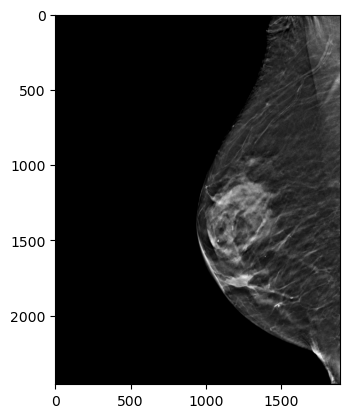

In [3]:
# rootdir = 'D:\MRI dataset\manifest-1617905855234\Breast-Cancer-Screening-DBT'
#WINDOWS
# rootdir = R'C:\Users\016103631\Desktop\MRI dataset\manifest-1617905855234\Breast-Cancer-Screening-DBT'

# destination = 'D:\MRI dataset\data\\train'
# destination = R'C:\Users\016103631\Desktop\MRI dataset\train'
############
#MAC
rootdir = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/manifest-1677805544485/Breast-Cancer-Screening-DBT'
destination = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/train'
############

for index, row in df_true.iterrows():

    name = str(row['PatientID'])
    slice_index = row['Slice']
    uuid_name = str(uuid.uuid4())
    annotation_file = name+'-'+uuid_name+'.txt'

    # f = open(destination+'\\'+annotation_file, "w")
    f = open(destination+'/'+annotation_file, "w")


    if row['Benign'] == 1:
        classe = 0
    elif row['Cancer'] == 1:
        classe = 1
    elif row['Actionable'] == 1:
        classe = 2
    
    x = row['X']
    y = row['Y']
    width = row['Width']
    height = row['Height']

    if classe is not None:
        f.write(f"{classe} {x} {y} {width} {height}")
        # f.write(str(classe)+' '+row['X']+' '+row['Y']+' '+row['Width']+' '+row['Height'])
                            
    f.close()
    # row['descriptive_path'] = row['descriptive_path'].replace('\\\\','\\')
    # split = row['descriptive_path'].split('\\')
    # split[-2] = split[-2].replace('-','-NA-')
    # path = '\\'.join(split)
    # MAC
    split = row['descriptive_path'].split('/')
    split[-2] = split[-2].replace('-','-NA-')
    path = '/'.join(split)
    # print(path)

    view = row["View"]

    print(f'Processando imagem {path}')

    image = dcmread_image(fp=path, view=view, index=slice_index)
    plt.imshow(image, cmap=plt.cm.gray)

    # ds = dcmread(path)
    # pixel_array = ds.pixel_array
    # # plt.imshow(pixel_array[0],cmap=plt.cm.gray)
    annotation_file = annotation_file.replace('.txt','.jpg')

    # plt.imsave(destination+'\\'+annotation_file, image[0],  format="jpg", cmap=plt.cm.gray)
    plt.imsave(destination+'/'+annotation_file, image,  format="jpg", cmap=plt.cm.gray)
    # cv2.imwrite(destination+'\\'+annotation_file, image[0])


    

In [3]:
##PROCESSA IMAGENS QUE NÃO POSSUEM TRUE POSITIVE

rootdir = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/manifest-1677805544485/Breast-Cancer-Screening-DBT'
destination = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/train2'

for index, row in df_paths.iterrows():

    name = str(row['PatientID'])
    uuid_name = str(uuid.uuid4())
    annotation_file = name+'-'+uuid_name+'.jpg'

    split = row['descriptive_path'].split('/')
    split[-2] = split[-2].replace('-','-NA-')
    path = '/'.join(split)
    view = row["View"]
    image = dcmread_image(fp=path, view=view)
    plt.imsave(destination+'/'+annotation_file, image[0],  format="jpg", cmap=plt.cm.gray)
    df_paths.drop(index, inplace=True)



10
16
10
16
10
16


In [77]:
split = row['descriptive_path'].split('\\')
split[-2] = split[-2].replace('-','-NA-')
path = '\\'.join(split)

'C:\\Users\\016103631\\Desktop\\MRI dataset\\manifest-1617905855234\\Breast-Cancer-Screening-DBT\\DBT-P00013\\01-01-2000-DBT-S00163-MAMMO DIAGNOSTIC DIGITAL BILATERAL-56865\\20566.000000-NA-32081\\1-1.dcm'

In [52]:
# rootdir = 'D:\MRI dataset\manifest-1617905855234\Breast-Cancer-Screening-DBT'
rootdir = R'C:\Users\016103631\Desktop\MRI dataset\manifest-1617905855234\Breast-Cancer-Screening-DBT'

# destination = 'D:\MRI dataset\data\\train'
destination = R'C:\Users\016103631\Desktop\MRI dataset\train'
def mv_dcm_files(dirpath, filetype):
    paths = []
    for rootdir, dirs, files in os.walk(dirpath):      
        for id in dirs:
            print(id)
            value = df_true.loc[df_true['PatientID'] == id]
            if not value.empty:
                new_path = dirpath + '\\'+id
                n_file = 0
                for rootdir, dirs, files in os.walk(new_path):
                    # if n_file == 0:
                    #     print(rootdir)
                    #     print(value)
                    for file in files:
                        if file.lower().endswith(filetype.lower()):
                            filepath = os.path.join(rootdir, file)
                            print("TO AQUI DENTRO")
                            name = str(value['PatientID'][0])
                            uuid_name = str(uuid.uuid4())
                            annotation_file = name+'-'+uuid_name+'.txt'
                            
                            classe = None
                            print(f"TESTE {value['Benign'][0]}")
                            if 1 in value['Benign']:
                                classe = 0
                                # shutil.move(filepath, destination+'\\Benign\\'+name+'-'+uuid_name+'.dcm')
                            elif 1 in value['Cancer']:
                                classe = 1
                                # shutil.move(filepath, destination+'\\Cancer\\'+name+'-'+uuid_name+'.dcm')
                            elif 1 in value['Actionable']:
                                classe = 2
                                # shutil.move(filepath, destination+'\\Cancer\\'+name+'-'+uuid_name+'.dcm')
                            # else:
                            #     shutil.move(filepath, destination+'\\Normal\\'+name+'-'+uuid_name+'.dcm')

                    n_file+=1


                    # filepath = filepath.strip(R'D:\\MRI dataset\\manifest-1617905855234')
                            # paths.append(filepath)
    return paths

mv_dcm_files(rootdir, '.dcm')

DBT-P00003
DBT-P00005
DBT-P00006
DBT-P00007
DBT-P00008
DBT-P00009
DBT-P00010
DBT-P00011
DBT-P00012
DBT-P00013
TO AQUI DENTRO
TESTE 1
DBT-P00014
DBT-P00015
DBT-P00016
DBT-P00017
DBT-P00019
DBT-P00020
DBT-P00022
DBT-P00023
DBT-P00024
TO AQUI DENTRO


KeyError: 0

In [ ]:
view_series = df.iloc[0]
view = view_series["View"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join("/data", view_series["descriptive_path"])


In [ ]:
# %%time
# image = dcmread_image(fp='1-1.dcm', view=view)

RuntimeError: The pixel data handler 'pylibjpeg' is not available on your system. Please refer to the pydicom documentation for information on installing needed packages.

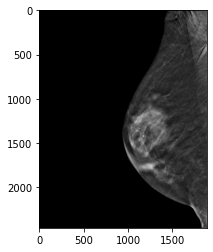

In [ ]:
plt.imshow(image[0], cmap=plt.cm.gray);